<h1 style="color:Orange"> Solar Payments Predictions</h1>

![Alt text](money.jpg)

<h1 style="color:orange"> Business Understanding</h1>
It is estimated that 592 million people in Africa are living without access to electricity. Most of these people live outside of urban centers, and therefore out of reach of the continent’s electricity grid. And as many of us have experienced, the existing systems in many African countries even struggle to supply enough energy to the homes and businesses that are on the grid.
<h2 style="color:orange"> Company Introduction</h2>
PAYGo is a pioneering, game-changing credit system that removes the initial financial barrier to solar energy access by allowing consumers to make a series of modest payments to purchase time units (or tokens) for using solar electricity instead of paying upfront for the entire solar lighting system. After the payments are complete, the customer then owns the solar power device, which they can use at no additional cost.

<h2 style="color:orange"> Objectives</h2>
The objective of this challenge is to help predict the next six months of payments for different customers. This will allow PAYGo distributors to provide appropriate services and customer support, ensuring that they can continue to provide these important devices affordably and efficiently to the benefit of people all over Africa.
<h2 style="color:orange">Model Selection</h2>
This project uses **CatBoostRegressor**

<h2 style="color:orange">Accuracy Metric</h2>
The model performance of this project will be analyzed using the root mean squared error.

![Alt text](solar.jpg)


<h1 style="color:orange">Setting up environment</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

**Load dataset using Pandas. Please make sure the data is in a 'data' folder before loading the dataset.**

In [4]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/Test.csv")
ss = pd.read_csv("../data/SampleSubmission.csv")
meta = pd.read_csv("../data/metadata.csv")

C:\Users\good\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Combine Test and Train set to do data preprocessing once.**

In [5]:
data = train.append(test).reset_index(drop=True)

In [6]:
data

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0
...,...,...,...,...,...,...,...,...,...
37338,ID_ATLMXQX,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2690.0, 270.0, 770.0, 1100.0, 700.0, 550.0, 5...",NaN,NaN,NaN,NaN,NaN,NaN
37339,ID_DYMC72D,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2950.0, 1550.0, 1500.0, 900.0, 80.0, 1550.0, ...",NaN,NaN,NaN,NaN,NaN,NaN
37340,ID_5CBGHCN,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 500.0, 550.0, 250.0, 200.0, 450.0, 45...",NaN,NaN,NaN,NaN,NaN,NaN
37341,ID_HYHB585,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 800.0, 250.0, 300.0, 1100.0, 950.0, 8...",NaN,NaN,NaN,NaN,NaN,NaN


<h2 style="color:orange">EDA</h2>

Replace missing date in Meta data with the year Paygo Solar was created. "any odd date could have been used, we just wanted to find a way to inform the model that it doesn't exist."

In [7]:
for i in ["UpsellDate","RegistrationDate","ExpectedTermDate","FirstPaymentDate","LastPaymentDate"]:
    meta[i] = meta[i].apply(pd.to_datetime)
    meta[i] = meta[i].fillna(pd.Timestamp('1990-01-01'))
    #meta[i].replace({np.nan: None}, inplace = True)
    
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37343 entries, 0 to 37342
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   37343 non-null  object        
 1   RegistrationDate     37343 non-null  datetime64[ns]
 2   Deposit              37343 non-null  int64         
 3   UpsellDate           37343 non-null  datetime64[ns]
 4   AccessoryRate        37343 non-null  float64       
 5   PaymentMethod        37343 non-null  object        
 6   rateTypeEntity       37343 non-null  object        
 7   RatePerUnit          37343 non-null  int64         
 8   DaysOnDeposit        37343 non-null  int64         
 9   MainApplicantGender  37343 non-null  object        
 10  Age                  30404 non-null  float64       
 11  Region               35409 non-null  object        
 12  Town                 37343 non-null  object        
 13  Occupation           37343 non-

In [8]:
meta

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10 00:00:00,2000,1990-01-01 00:00:00,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,1990-01-01 00:00:00,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,1990-01-01 00:00:00,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,1990-01-01 00:00:00,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37338,ID_OKJ96OW,2020-02-20 18:26:52,2400,1990-01-01 00:00:00,0.0,FINANCED,DAILY,50,3,Female,38.0,Western,Bungoma,Farmer,d_light,240,14400.0,2020-10-17 18:26:52,2020-02-20 18:26:58,2020-12-19 07:16:44
37339,ID_5J9OMUP,2020-02-20 18:30:59,2400,1990-01-01 00:00:00,0.0,FINANCED,DAILY,50,3,Male,23.0,Nyanza,Siaya,Labourer,d_light,240,14400.0,2020-10-17 18:30:59,2020-02-20 18:31:06,2021-05-18 16:07:49
37340,ID_J4I8Z2V,2020-02-20 18:42:26,3000,1990-01-01 00:00:00,0.0,FINANCED,DAILY,40,3,Male,31.0,Coast Region,Kwale,Teacher,d_light,340,16600.0,2021-01-25 18:42:26,2020-02-20 18:42:33,2021-04-21 15:59:37
37341,ID_GHHAQ9D,2020-02-20 18:46:30,2400,1990-01-01 00:00:00,0.0,FINANCED,DAILY,50,3,Male,27.0,NaN,UNKNOWN,Labourer,d_light,240,14400.0,2020-10-17 18:46:30,2020-02-20 18:46:37,2021-04-24 19:06:01


**Use Pandas Cat.Codes to handle categorical columns**

In [9]:
# Identify categorical columns
categorical_columns = meta.select_dtypes(include=['object', 'category']).columns.drop("ID")

# Convert categorical columns to numerical codes
for column in categorical_columns:
    meta[column] = meta[column].astype('category').cat.codes

In [10]:
ss.head()

,ID,Target
0,ID_6L67PAA x m1,0.0
1,ID_6L67PAA x m2,0.0
2,ID_6L67PAA x m3,0.0
3,ID_6L67PAA x m4,0.0
4,ID_6L67PAA x m5,0.0


**Create a function to expand the list of dates in both the train and test set, replace missing dates (probably payment has been completed), with 1990.**

In [11]:
import pandas as pd
import ast

def expand_list_column(df, column_name, type_):
    # Convert the string representation to a list
    df[column_name] = [str(i) for i in df[column_name]]
    df[column_name] = df[column_name].apply(ast.literal_eval)

    # Determine the maximum number of elements in a list
    max_elements = df[column_name].apply(lambda x: len(x)).max()

    # Create new column names
    new_columns = [f'{column_name}{i}' for i in range(max_elements)]

    # Expand the list column into separate columns
    expanded_df = pd.DataFrame(df[column_name].to_list(), columns=new_columns)
    

    if type_ == "date":
        # Convert all columns to datetime
        expanded_df = expanded_df.apply(pd.to_datetime)
        expanded_df = expanded_df.fillna(pd.Timestamp('1990-01-01'))
        #expanded_df.replace({np.nan: np.nan}, inplace = True)
    elif type_ == "payment":
        expanded_df = expanded_df.astype(float)
    
        

    # Concatenate the expanded columns with the original DataFrame
    df_expanded = pd.concat([df.drop(column_name, axis=1), expanded_df], axis=1)

    return df_expanded

In [12]:
# Example usage
data = expand_list_column(data, 'TransactionDates', "date")
data = expand_list_column(data, 'PaymentsHistory', "payment")
data.head()

,ID,m1,m2,m3,m4,m5,m6,TransactionDates0,TransactionDates1,TransactionDates2,...,PaymentsHistory42,PaymentsHistory43,PaymentsHistory44,PaymentsHistory45,PaymentsHistory46,PaymentsHistory47,PaymentsHistory48,PaymentsHistory49,PaymentsHistory50,PaymentsHistory51
0,ID_MR53LEX,880.0,930.0,495.0,715.0,220.0,385.0,2018-04-01,2018-05-01,2018-06-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_3D7NQUH,660.0,935.0,935.0,825.0,770.0,935.0,2018-04-01,2018-05-01,2018-06-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_0IWQNPI,700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-01,2020-03-01,2020-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_IY8SYB9,580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-01,2017-10-01,2017-11-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_9XHL7VZ,40.0,440.0,460.0,360.0,80.0,330.0,2017-09-01,2017-10-01,2017-11-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37343 entries, 0 to 37342
Columns: 111 entries, ID to PaymentsHistory51
dtypes: datetime64[ns](52), float64(58), object(1)
memory usage: 31.6+ MB


In [14]:
data = pd.merge(data,meta, on="ID")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37343 entries, 0 to 37342
Columns: 130 entries, ID to LastPaymentDate
dtypes: datetime64[ns](57), float64(61), int64(4), int8(7), object(1)
memory usage: 35.6+ MB


**Split Train and Test Sets**

In [16]:
train_df  = data[~data['m1'].isna()].reset_index(drop=True)
test_df = data[data['m1'].isna()].reset_index(drop=True)

In [17]:
train_df.tail()

,ID,m1,m2,m3,m4,m5,m6,TransactionDates0,TransactionDates1,TransactionDates2,...,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
28002,ID_CDZ24L9,1640.0,1550.0,2045.0,850.0,1730.0,720.0,2018-03-01,2018-04-01,2018-05-01,...,NaN,0,13,4,0,556,33080.0,2019-10-01 09:52:09,2018-03-24 09:52:13,2019-10-11 12:37:41
28003,ID_0XINELS,900.0,950.0,650.0,750.0,1200.0,620.0,2020-02-01,2020-03-01,2020-04-01,...,NaN,2,29,0,0,240,14400.0,2020-10-14 13:34:57,2020-02-17 13:35:01,2021-03-13 14:23:22
28004,ID_PAU9JJU,680.0,460.0,799.0,1070.0,820.0,401.0,2020-01-01,2020-02-01,2020-03-01,...,29.0,5,11,0,0,270,12800.0,2020-10-11 11:12:06,2020-01-15 11:12:11,2021-03-28 16:01:16
28005,ID_K866QHS,1300.0,1055.0,1200.0,1200.0,1080.0,800.0,2018-02-01,2018-03-01,2018-04-01,...,57.0,1,25,0,0,364,16560.0,2019-02-24 16:51:21,2018-02-25 16:53:11,2019-03-20 16:38:09
28006,ID_L485J6M,970.0,1080.0,960.0,840.0,1000.0,370.0,2017-09-01,2017-10-01,2017-11-01,...,62.0,2,21,0,0,364,16560.0,2018-09-03 12:02:28,2017-09-04 12:02:37,2018-12-09 12:40:57


In [18]:
test_df.head()

,ID,m1,m2,m3,m4,m5,m6,TransactionDates0,TransactionDates1,TransactionDates2,...,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_6L67PAA,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2016-01-01,2016-02-01,...,33.0,0,13,5,0,364,14740.0,2016-12-07,2015-12-09 13:14:03,2020-05-24 15:32:18
1,ID_VJ80SX2,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2016-01-01,2016-02-01,...,NaN,1,5,0,0,364,14740.0,2016-12-12,2015-12-14 14:20:26,2016-12-12 11:59:20
2,ID_7OU9HLK,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2016-01-01,2016-03-01,...,32.0,1,5,0,0,364,14740.0,2016-12-04,2015-12-06 16:41:21,2020-07-22 07:08:17
3,ID_WVWTPGK,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2016-01-01,2016-02-01,...,42.0,1,14,5,0,364,14740.0,2016-12-03,2015-12-04 18:11:33,2017-05-17 16:26:08
4,ID_04DSDQS,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,2016-01-01,2016-02-01,...,38.0,1,14,5,0,364,14740.0,2016-12-09,2015-12-11 12:17:54,2017-02-11 18:42:24


In [19]:
X = train_df.drop(["ID","m1","m2","m3","m4","m5","m6"], axis=1)
test_df2 = test_df.drop(["ID","m1","m2","m3","m4","m5","m6"], axis=1)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Columns: 123 entries, TransactionDates0 to LastPaymentDate
dtypes: datetime64[ns](57), float64(55), int64(4), int8(7)
memory usage: 25.0 MB


In [21]:
import warnings
warnings.filterwarnings("ignore")

**Transform the Target Column**

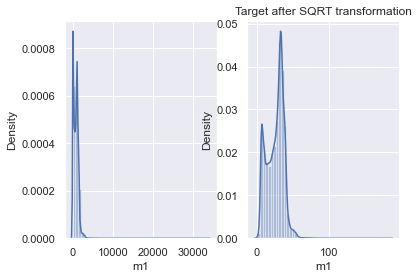

In [22]:
sns.set()
y = train_df["m1"]
y_transformed = pd.Series(np.sqrt(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after SQRT transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [21]:
!pip install -qq catboost

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

<h2 style="color:Orange">Baseline modelling</h2>

 - I'm taking advantage of the fact that Catboost allows Datetime features.

In [ ]:
ms = []
for u in ["m1","m2","m3","m4","m5","m6"]:
    y = train_df[u]

    fold_pred=[]
    oof_pred = []

    params = {'n_estimators':1200, 'max_depth': 10}
    
    fold= KFold(n_splits=10, shuffle=True, random_state = 23)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):     

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]
        
        model = CatBoostRegressor(**params)
        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

        preds= model.predict(X_test)
        print("err: ",(mean_squared_error(y_test,preds**2))**0.5)  #Reverse transformation
        oof_pred.append(mean_squared_error(y_test,preds**2)**0.5)
        p2 = model.predict(test_df[X.columns])
        fold_pred.append(p2**2)


    print(np.mean(oof_pred))
    ms.append(np.mean(fold_pred, axis = 0))

Prepare Submission

In [24]:
subx = pd.DataFrame()
subx["ID"] = test_df["ID"]
subx["m1"] = ms[0]
subx["m2"] = ms[1]
subx["m3"] = ms[2]
subx["m4"] = ms[3]
subx["m5"] = ms[4]
subx["m6"] = ms[5]

In [25]:
subx

,ID,m1,m2,m3,m4,m5,m6
0,ID_6L67PAA,337.537608,360.184310,255.950398,141.810273,171.808376,64.292377
1,ID_VJ80SX2,1027.493504,1053.249790,1072.500553,1032.510085,1059.801545,1179.455623
2,ID_7OU9HLK,244.752290,119.750229,171.695937,98.680134,124.962853,86.645287
3,ID_WVWTPGK,464.951456,522.875377,397.120554,342.137854,398.271497,102.117621
4,ID_04DSDQS,707.384553,836.453708,927.821065,879.541257,828.778984,415.623056
...,...,...,...,...,...,...,...
9331,ID_ATLMXQX,665.499594,534.583512,620.470240,530.957919,526.348754,479.811479
9332,ID_DYMC72D,509.592862,523.445528,390.841030,549.842097,789.938727,726.453167
9333,ID_5CBGHCN,456.740115,387.528508,320.742080,289.902920,226.915635,118.274832
9334,ID_HYHB585,340.530996,423.917262,571.775930,542.608370,503.396870,519.783476


In [26]:
# Reshape the DataFrame from wide to long format
df_long = pd.melt(subx, id_vars=['ID'], var_name='Target', value_name='Value')
df_long["ID"] = df_long["ID"] +" x " + df_long["Target"]
df_long = df_long.drop("Target", axis=1)

In [27]:
df_long

,ID,Value
0,ID_6L67PAA x m1,337.537608
1,ID_VJ80SX2 x m1,1027.493504
2,ID_7OU9HLK x m1,244.752290
3,ID_WVWTPGK x m1,464.951456
4,ID_04DSDQS x m1,707.384553
...,...,...
56011,ID_ATLMXQX x m6,479.811479
56012,ID_DYMC72D x m6,726.453167
56013,ID_5CBGHCN x m6,118.274832
56014,ID_HYHB585 x m6,519.783476


Submit to Zindi

In [28]:
# Create csv to upload to Zindi for scoring
name = 'Confirm Reproducibility.csv'
df_long.to_csv(name, index = False)

Plot Feature Importance Score

Text(0.5, 1.0, 'CatboostRegressor features importance (top 50):')

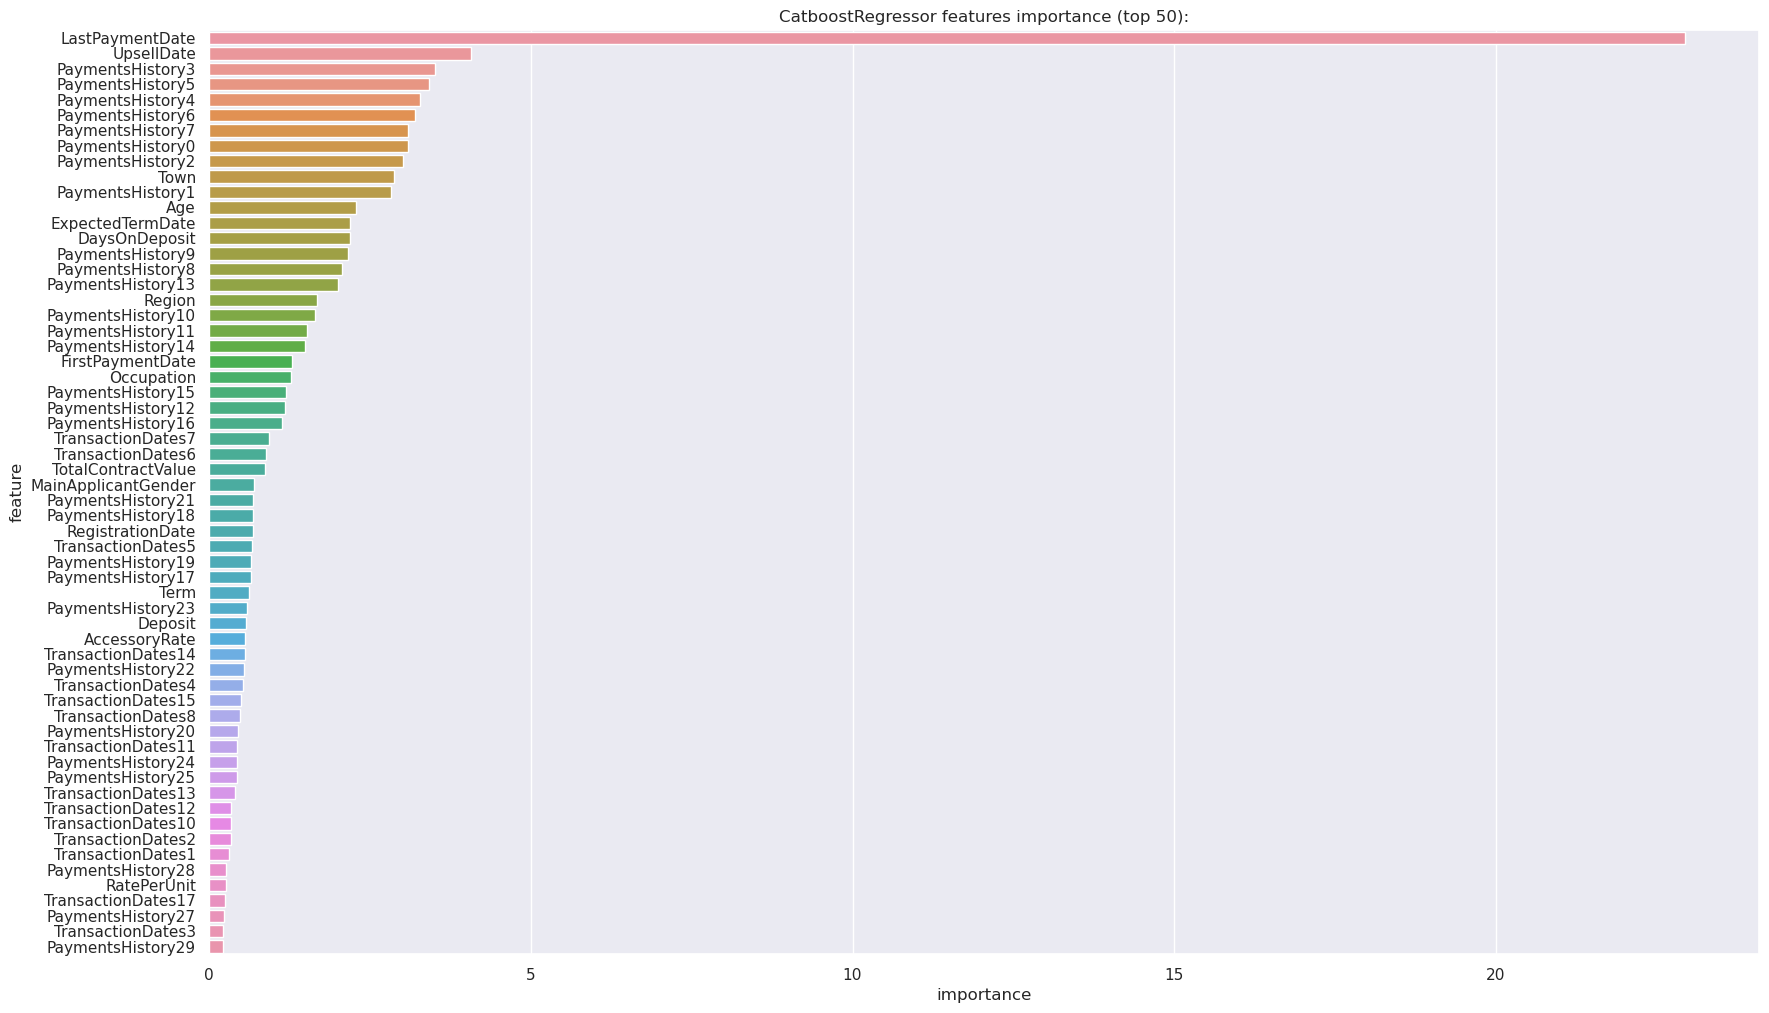

In [29]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostRegressor features importance (top 50):')

<h1 style="color:Orange">The End!!</h1>